<a href="https://colab.research.google.com/github/Almondbubby/Highlights/blob/main/Highlights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spliceosome

In [ ]:
spliceosome("footballgame.mp4", "timeStamps0.txt", "Out")

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [ ]:

import os
def uniquify(path):
    filename, extension = os.path.splitext(path)
    counter = 1

    while os.path.exists(path):
        path = filename +  str(counter)  + extension
        counter += 1

    return path

In [ ]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
import os
def spliceosome(vid, timesFile, outFolder):
  with open(timesFile) as f:
    times = f.readlines()
  times = [x.strip() for x in times]
  for time in times:
    start = str(time.split("-")[0])
    end = str(time.split("-")[1])
    name = time.split("-")[2]
    start = get_sec(start)
    end = get_sec(end)
    ffmpeg_extract_subclip(vid, start, end, targetname = uniquify(outFolder + "/" + name +".mp4"))

In [ ]:
def get_sec(time):
  h, m, s = time.split(":")
  return int(int(h) * 3600 + int(m) * 60 + int(s))

In [ ]:
import os, shutil
os.makedirs("Out", exist_ok=True)
folder = 'Out'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [ ]:
# import cv2
# import numpy as np

# cap = cv2.VideoCapture('sample-5s.mp4')
# frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# print(frameCount)

# buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

# fc = 0
# ret = True

# while (fc < frameCount  and ret):
#     ret, buf[fc] = cap.read()
#     #print(buf[fc].shape)
   
#     #print(fc)
#     fc += 1

# print("escaped " + str(fc))
# print(buf.shape)



171
escaped 171
(171, 1080, 1920, 3)


In [ ]:
#makes mp4 into individual frames

import cv2
frames = []

# Function to extract frames from an MP4 video
def extract_frames(video_path, output_folder):
    # Open the video file
    video = cv2.VideoCapture(video_path)

    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Initialize variables
    frame_count = 0

    # Read the video frames
    while True:
        # Read the next frame
        ret, frame = video.read()
        #print(type(frame))

        frames.append(frame)

        # Break the loop if no frames are captured
        if not ret:
            break

        # Save the frame as an image
        frame_path = os.path.join(output_folder, f"frame_{frame_count}.jpg")
        cv2.imwrite(frame_path, frame)

        # Increment the frame count
        frame_count += 1

    # Release the video file
    video.release()

# Example usage
video_path = "Out/catch.mp4"
output_folder = "frames"

extract_frames(video_path, output_folder)

# Torchvision Mask R-CNN

This is a [Mask R-CNN](https://arxiv.org/abs/1703.06870) colab notebook using [torchvision](https://pytorch.org/docs/stable/torchvision/index.html).

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).

In [ ]:
import os
from os.path import exists, join, basename, splitext

import random
import PIL
import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)
  
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

## Initialize Mask R-CNN and download pretrained weights

In [ ]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model = model.eval().cuda()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:00<00:00, 283MB/s]


## Detect objects on a test image

First, dowload a test image from internet:

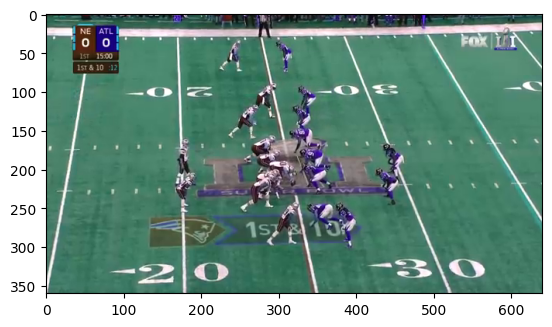

In [ ]:
#IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/dog.jpg'


#image_file = basename(IMAGE_URL)
#!wget -q -O {image_file} {IMAGE_URL}
#plt.imshow(matplotlib.image.imread(image_file))

#print(type(image_file))
#30fps
#image_file = frames[0]
img = frames[120]
plt.imshow(img)



Execute  Mask R-CNN model on that image and show the result:

In [ ]:
def makeSegFrame(img):
  image_tensor = torchvision.transforms.functional.to_tensor(img).cuda()
  output = model([image_tensor])[0]
  masks = None
  for score, mask, label in zip(output['scores'], output['masks'], output['labels']):
    if score > 0.5 and label.item() == 1:
      if masks is None:
        masks = mask
      else:
        masks = torch.max(masks, mask)
  return masks.squeeze(0).cpu().numpy()
    

In [ ]:
segFrames = []

for i in range(len(frames)):
  segFrames.append(makeSegFrame(frames[i]) - 1)
  print("frame: " + str(i))

#frame = makeSegFrame(frames[120])
#plt.imshow(frame)

In [ ]:
len(segFrames)

1050

In [ ]:
print(segFrames[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
import cv2
import numpy as np
from PIL import Image

# Assuming you have an array of NumPy arrays named 'frames'
# Each frame is a NumPy array representing an image frame

# Get the shape of the first frame to determine video dimensions
height, width, _ = frames[0].shape

# Define the output video path and codec
output_path = 'output.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Create a VideoWriter object to write the frames into the video
out = cv2.VideoWriter(output_path, fourcc, 30.0, (width, height))

# Write each frame into the video
for i in range(len(segFrames)):
 # if img is grayscale, expand
    new_img = np.zeros((height,width,3))
    for ch in range(3):
        for xx in range(height):
            for yy in range(width):
                new_img[xx,yy,ch] = segFrames[i][xx,yy]
    #print(new_img)
    
    # Convert the frame to the BGR color format (required by OpenCV)
    #frame_bgr = cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
    #print(type(frame_bgr))
    # Write the frame to the video
    #image_obj = Image.fromarray(new_img.astype(np.uint8))
    out.write(new_img.astype(np.uint8))
    print("frame: " + str(i))

# Release the VideoWriter object
out.release()

frame: 0
frame: 1
frame: 2
frame: 3
frame: 4
frame: 5
frame: 6
frame: 7
frame: 8
frame: 9
frame: 10
frame: 11
frame: 12
frame: 13
frame: 14
frame: 15
frame: 16
frame: 17
frame: 18
frame: 19
frame: 20
frame: 21
frame: 22
frame: 23
frame: 24
frame: 25
frame: 26
frame: 27
frame: 28
frame: 29
frame: 30
frame: 31
frame: 32
frame: 33
frame: 34
frame: 35
frame: 36
frame: 37
frame: 38
frame: 39
frame: 40
frame: 41
frame: 42
frame: 43
frame: 44
frame: 45
frame: 46
frame: 47
frame: 48
frame: 49
frame: 50
frame: 51
frame: 52
frame: 53
frame: 54
frame: 55
frame: 56
frame: 57
frame: 58
frame: 59
frame: 60
frame: 61
frame: 62
frame: 63
frame: 64
frame: 65
frame: 66
frame: 67
frame: 68
frame: 69
frame: 70
frame: 71
frame: 72
frame: 73
frame: 74
frame: 75
frame: 76
frame: 77
frame: 78
frame: 79
frame: 80
frame: 81
frame: 82
frame: 83
frame: 84
frame: 85
frame: 86
frame: 87
frame: 88
frame: 89
frame: 90
frame: 91
frame: 92
frame: 93
frame: 94
frame: 95
frame: 96
frame: 97
frame: 98
frame: 99
frame: 100

In [ ]:
t = time.time()
#image = PIL.Image.open(image_file)
image_tensor = torchvision.transforms.functional.to_tensor(img).cuda()
output = model([image_tensor])[0]
print('executed in %.3fs' % (time.time() - t))

executed in 0.299s


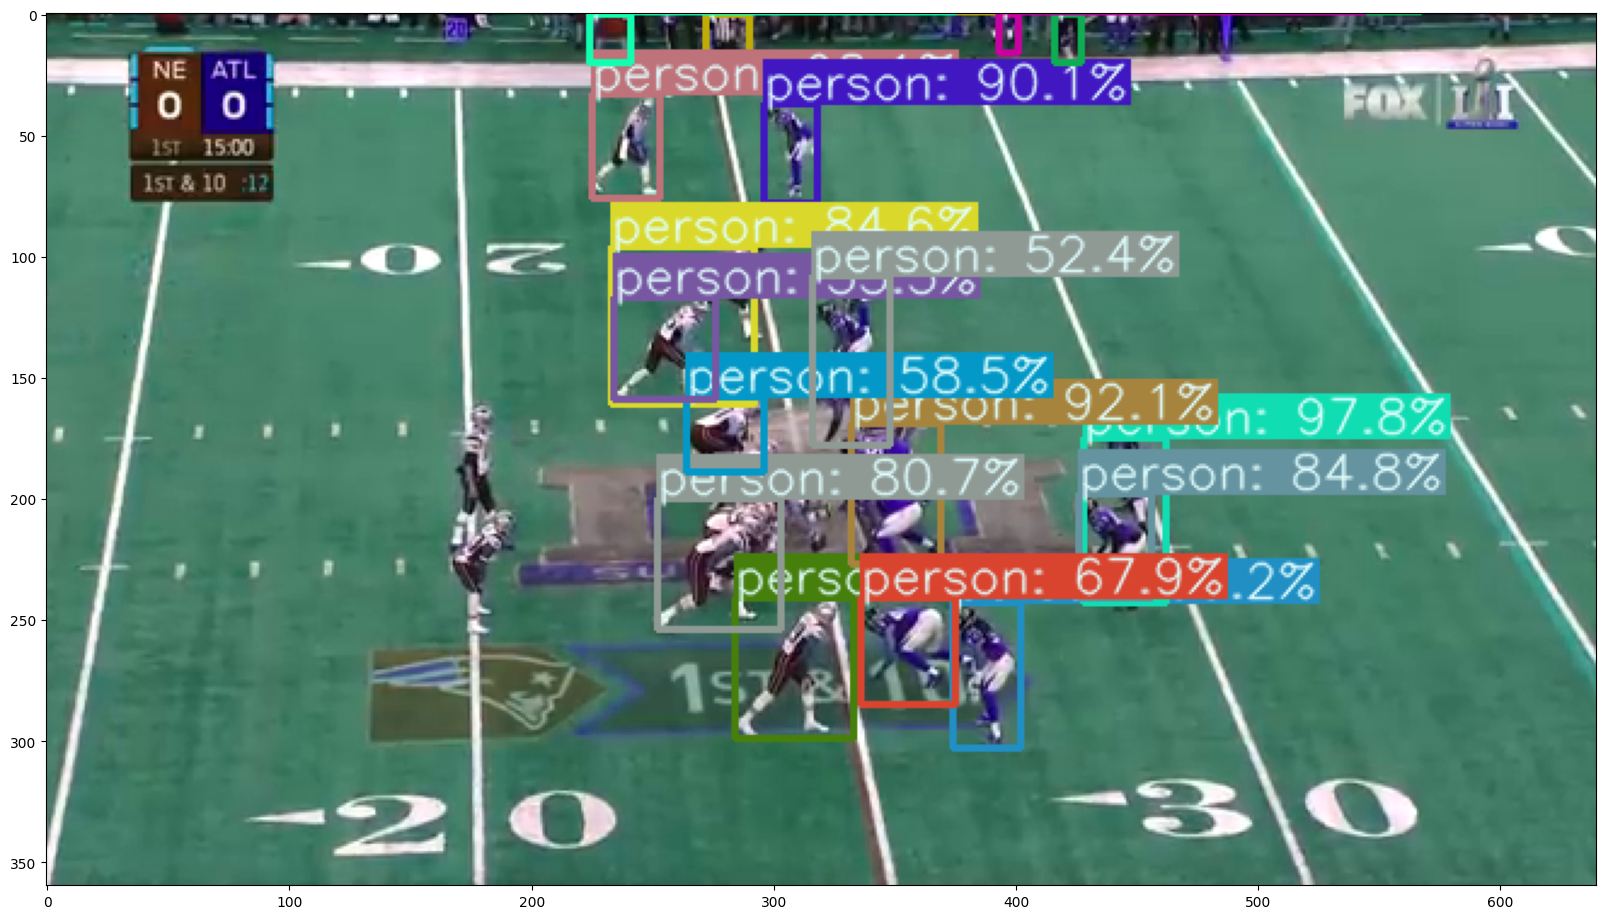

In [ ]:
coco_names = ['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
#coco_names = ['person']
colors = [[random.randint(0, 255) for _ in range(3)] for _ in coco_names]

result_image = np.array(img.copy())
for box, label, score in zip(output['boxes'], output['labels'], output['scores']):
  if score > 0.5 and label.item() == 1 :
    #print(label)
    #print(label.item())
    color = random.choice(colors)
    
    # draw box
    tl = round(0.002 * max(result_image.shape[0:2])) + 1  # line thickness
    c1, c2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
    cv2.rectangle(result_image, c1, c2, color, thickness=tl)
    # draw text
    display_txt = "%s: %.1f%%" % (coco_names[label], 100*score)
    tf = max(tl - 1, 1)  # font thickness
    t_size = cv2.getTextSize(display_txt, 0, fontScale=tl / 3, thickness=tf)[0]
    c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
    cv2.rectangle(result_image, c1, c2, color, -1)  # filled
    cv2.putText(result_image, display_txt, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
  
plt.figure(figsize=(20, 15))
plt.imshow(result_image)

Show masks for the above objects:

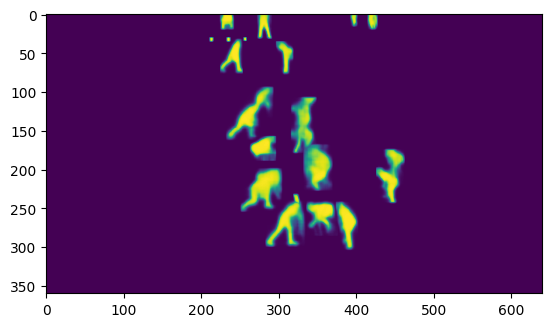

In [ ]:
masks = None
for score, mask, label in zip(output['scores'], output['masks'], output['labels']):
  if score > 0.5 and label.item() == 1:
    if masks is None:
      masks = mask
    else:
      masks = torch.max(masks, mask)

plt.imshow(masks.squeeze(0).cpu().numpy())